In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import requests as r
from math import sin, cos, sqrt, atan2, radians
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector, RFECV
from scipy import stats

random_state=42
num_samples = 75000
itr = 50

In [2]:
url = 'https://envera-consulting-public-assets.s3.us-west-1.amazonaws.com/ssie-637-final-dataset.csv'
df = pd.read_csv(url)

In [3]:
df.shape

(69073, 32)

In [4]:
sub_list = ['hour', 'Call Priority', 'delta_1_min',
            'delta_2_min', 'delta_3_min',
            'delta_4_min', 'delta_5_min',
            'delta_6_min', 'delta_7_min',
            'distance_km']

sub_list2 = ['delta_1_min',
            'delta_2_min', 'delta_3_min',
            'delta_4_min', 'delta_5_min',
            'delta_6_min', 'delta_7_min',
            'distance_km']

In [5]:
new_df2 = df[sub_list]

In [6]:
new_df2.head(2)

,hour,Call Priority,delta_1_min,delta_2_min,delta_3_min,delta_4_min,delta_5_min,delta_6_min,delta_7_min,distance_km
0,6,1,1.850000,1.100000,2.733333,5.65,62.316667,11.333333,2.95,3.550461
1,17,2,1.166667,0.183333,3.016667,3.80,60.850000,8.166667,1.35,3.550461


In [7]:
Q1 = new_df2[sub_list2].quantile(0.25) 
Q3 = new_df2[sub_list2].quantile(0.75)
IQR = Q3 - Q1
condition = ~((new_df2[sub_list2] < (Q1 - 1.5 * IQR)) | (new_df2[sub_list2] > (Q3 + 1.5 * IQR))).any(axis=1)

new_df2 = new_df2[condition]

In [8]:
new_df2.shape

(55708, 10)

In [9]:
new_df2.describe()

,hour,Call Priority,delta_1_min,delta_2_min,delta_3_min,delta_4_min,delta_5_min,delta_6_min,delta_7_min,distance_km
count,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000
mean,12.711424,1.262117,1.454727,0.569621,0.840678,4.861411,60.573323,7.726437,2.024348,5.977064
std,6.183895,0.455824,0.728115,0.334397,0.612458,2.452944,26.068367,2.837925,0.807573,4.011997
min,0.000000,1.000000,-0.383333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.270028
25%,9.000000,1.000000,0.966667,0.316667,0.333333,3.216667,45.050000,5.883333,1.483333,3.550461
50%,13.000000,1.000000,1.400000,0.500000,0.750000,4.516667,63.400000,7.416667,1.983333,3.550461
75%,18.000000,2.000000,1.916667,0.750000,1.216667,6.216667,77.987500,9.350000,2.550000,8.890338
max,23.000000,4.000000,3.500000,1.600000,2.750000,12.166667,130.233333,16.750000,4.566667,17.711837


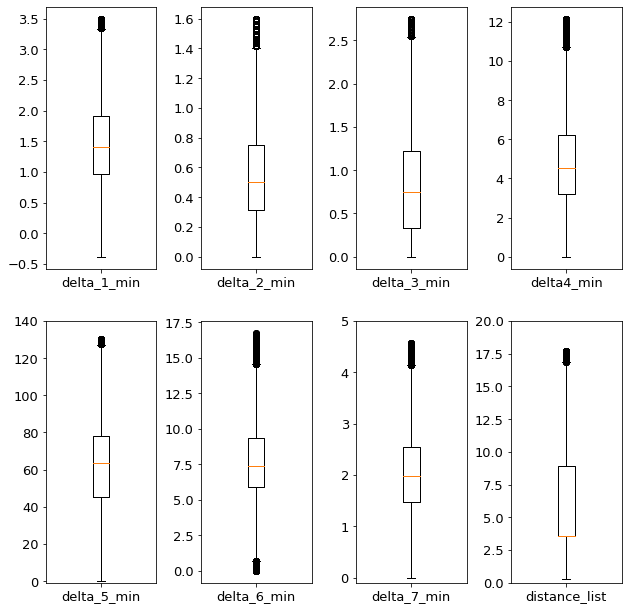

In [10]:
delta_1_min_list = new_df2['delta_1_min'].values.tolist()
delta_2_min_list = new_df2['delta_2_min'].values.tolist()
delta_3_min_list = new_df2['delta_3_min'].values.tolist()
delta_4_min_list = new_df2['delta_4_min'].values.tolist()
delta_5_min_list = new_df2['delta_5_min'].values.tolist()
delta_6_min_list = new_df2['delta_6_min'].values.tolist()
delta_7_min_list = new_df2['delta_7_min'].values.tolist()
hour_list = new_df2['hour'].values.tolist()
priority_list = new_df2['Call Priority'].values.tolist()
distance_list = new_df2['distance_km'].values.tolist()


plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.2)
num_rows = 2
num_col = 4
rotation = 0
fontsize = 13

plt.subplot(num_rows,num_col,1)
plt.boxplot([delta_1_min_list])
plt.xticks([1], ['delta_1_min'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)


plt.subplot(num_rows,num_col,2)
plt.boxplot([delta_2_min_list])
plt.xticks([1], ['delta_2_min'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)

plt.subplot(num_rows,num_col,3)
plt.boxplot([delta_3_min_list])
plt.xticks([1], ['delta_3_min'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)

plt.subplot(num_rows,num_col,4)
plt.boxplot([delta_4_min_list])
plt.xticks([1], ['delta4_min'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)

plt.subplot(num_rows,num_col,5)
plt.boxplot([delta_5_min_list])
plt.xticks([1], ['delta_5_min'], fontsize=fontsize, rotation=rotation)
plt.ylim(-0.9, 140, 20)
plt.yticks(fontsize=13)

plt.subplot(num_rows,num_col,6)
plt.boxplot([delta_6_min_list])
plt.xticks([1], ['delta_6_min'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)

plt.subplot(num_rows,num_col,7)
plt.boxplot([delta_7_min_list])
plt.xticks([1], ['delta_7_min'], fontsize=fontsize, rotation=rotation)
plt.ylim(-0.1, 5, 1)
plt.yticks(fontsize=13)


plt.subplot(num_rows,num_col,8)
plt.boxplot([distance_list])
plt.xticks([1], ['distance_list'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)
plt.ylim(0, 20, 2)


plt.show()

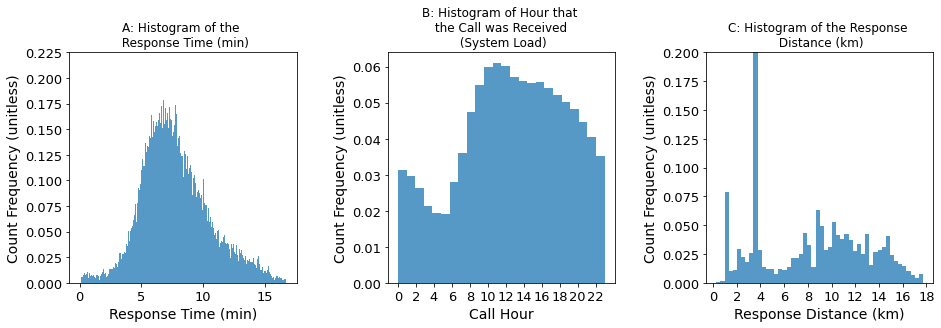

In [11]:
plt.figure(figsize=(15, 4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)

plt.subplot(1,3,1)
plt.hist(delta_6_min_list, bins=500, density=True, alpha=0.75)
plt.xlabel('Response Time (min)', fontsize=14)
plt.ylabel('Count Frequency (unitless)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0, 0.225)
plt.title('A: Histogram of the \n Response Time (min)')

plt.subplot(1,3,2)
plt.hist(hour_list, density=True, bins=24, alpha=0.75)

plt.ylabel('Count Frequency (unitless)', fontsize=14)
plt.xlabel('Call Hour', fontsize=14)
plt.xticks(np.arange(0, 24, step=2), fontsize=13) 
plt.yticks(fontsize=13)
plt.title('B: Histogram of Hour that \n the Call was Received \n (System Load)')

plt.subplot(1,3,3)
plt.hist(distance_list, density=True, bins=50, alpha=0.75)
plt.xlabel('Response Distance (km)', fontsize=14)
plt.ylabel('Count Frequency (unitless)', fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(np.arange(0, 20, step=2), fontsize=13) 
plt.ylim(0, 0.2)
plt.title('C: Histogram of the Response \n Distance (km)')

plt.show()

In [12]:
col_sub = ['Call Priority','hour', 'delta_1_min', 'delta_2_min',
           'delta_3_min', 'delta_4_min', 'delta_5_min', 'delta_6_min', 
           'delta_7_min', 'distance_km']
col_sub2 = ['hour', 'delta_1_min', 'delta_2_min',
           'delta_3_min', 'delta_4_min', 'delta_5_min', 'delta_6_min', 
           'delta_7_min', 'distance_km']
col_sub3 = ['Call Priority', 'delta_1_min', 'delta_2_min',
           'delta_3_min', 'delta_4_min', 'delta_5_min', 'delta_6_min', 
           'delta_7_min', 'distance_km']
col_sub4 = ['hour', 'distance_km', 'delta_6_min']

col_sub5 = ['Call Priority', 'distance_km', 'delta_6_min']
col_sub6 = ['hour', 'Call Priority', 'distance_km', 'delta_6_min']


col_sub7 = ['Call Priority', 'delta_6_min']
col_sub8 = ['hour', 'delta_6_min']
col_sub9 = ['Call Priority', 'hour', 'delta_6_min']

In [13]:
final_df = new_df2[col_sub]
final_df.describe()

,Call Priority,hour,delta_1_min,delta_2_min,delta_3_min,delta_4_min,delta_5_min,delta_6_min,delta_7_min,distance_km
count,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000
mean,1.262117,12.711424,1.454727,0.569621,0.840678,4.861411,60.573323,7.726437,2.024348,5.977064
std,0.455824,6.183895,0.728115,0.334397,0.612458,2.452944,26.068367,2.837925,0.807573,4.011997
min,1.000000,0.000000,-0.383333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.270028
25%,1.000000,9.000000,0.966667,0.316667,0.333333,3.216667,45.050000,5.883333,1.483333,3.550461
50%,1.000000,13.000000,1.400000,0.500000,0.750000,4.516667,63.400000,7.416667,1.983333,3.550461
75%,2.000000,18.000000,1.916667,0.750000,1.216667,6.216667,77.987500,9.350000,2.550000,8.890338
max,4.000000,23.000000,3.500000,1.600000,2.750000,12.166667,130.233333,16.750000,4.566667,17.711837


In [14]:
final_df2 = new_df2[col_sub2]

In [15]:
final_df2.head()

,hour,delta_1_min,delta_2_min,delta_3_min,delta_4_min,delta_5_min,delta_6_min,delta_7_min,distance_km
0,6,1.850000,1.100000,2.733333,5.650000,62.316667,11.333333,2.95,3.550461
2,8,1.633333,0.866667,0.833333,4.883333,49.533333,8.216667,2.50,14.913509
3,19,1.400000,0.450000,0.733333,3.416667,71.483333,6.000000,1.85,3.322459
4,19,1.433333,0.516667,1.500000,10.700000,31.533333,14.150000,1.95,3.550461
6,9,0.950000,0.350000,0.933333,2.433333,74.366667,4.666667,1.30,10.985953


In [16]:
final_df3 = new_df2[col_sub3]
final_df3.head()

,Call Priority,delta_1_min,delta_2_min,delta_3_min,delta_4_min,delta_5_min,delta_6_min,delta_7_min,distance_km
0,1,1.850000,1.100000,2.733333,5.650000,62.316667,11.333333,2.95,3.550461
2,1,1.633333,0.866667,0.833333,4.883333,49.533333,8.216667,2.50,14.913509
3,1,1.400000,0.450000,0.733333,3.416667,71.483333,6.000000,1.85,3.322459
4,1,1.433333,0.516667,1.500000,10.700000,31.533333,14.150000,1.95,3.550461
6,1,0.950000,0.350000,0.933333,2.433333,74.366667,4.666667,1.30,10.985953


In [17]:
final_df4 = new_df2[col_sub4]
final_df4.head()

,hour,distance_km,delta_6_min
0,6,3.550461,11.333333
2,8,14.913509,8.216667
3,19,3.322459,6.000000
4,19,3.550461,14.150000
6,9,10.985953,4.666667


In [18]:
final_df5 = new_df2[col_sub5]
final_df5.head()

,Call Priority,distance_km,delta_6_min
0,1,3.550461,11.333333
2,1,14.913509,8.216667
3,1,3.322459,6.000000
4,1,3.550461,14.150000
6,1,10.985953,4.666667


In [19]:
final_df6 = new_df2[col_sub6]
final_df6.head()

,hour,Call Priority,distance_km,delta_6_min
0,6,1,3.550461,11.333333
2,8,1,14.913509,8.216667
3,19,1,3.322459,6.000000
4,19,1,3.550461,14.150000
6,9,1,10.985953,4.666667


In [20]:
final_df7 = new_df2[col_sub7]
final_df7.head()

,Call Priority,delta_6_min
0,1,11.333333
2,1,8.216667
3,1,6.000000
4,1,14.150000
6,1,4.666667


In [21]:
final_df8 = new_df2[col_sub8]
final_df8.head()

,hour,delta_6_min
0,6,11.333333
2,8,8.216667
3,19,6.000000
4,19,14.150000
6,9,4.666667


In [22]:
final_df9 = new_df2[col_sub9]
final_df9.head()

,Call Priority,hour,delta_6_min
0,1,6,11.333333
2,1,8,8.216667
3,1,19,6.000000
4,1,19,14.150000
6,1,9,4.666667


In [23]:
one = OneHotEncoder()
std = StandardScaler()

#final_df
col_transform_1 = make_column_transformer(
    (one, ['Call Priority', 'hour']),
    (std, ['distance_km', 'delta_1_min', 'delta_2_min', 'delta_3_min', 
            'delta_4_min', 'delta_5_min', 'delta_7_min', 'delta_6_min']),
    remainder='passthrough')

#final_df2
col_transform_2 = make_column_transformer(
    (one, ['hour']),
    (std, ['distance_km', 'delta_1_min', 'delta_2_min', 'delta_3_min', 
            'delta_4_min', 'delta_5_min', 'delta_7_min', 'delta_6_min']),
    remainder='passthrough')

#final_df3
col_transform_3 = make_column_transformer(
    (one, ['Call Priority']),
    (std, ['distance_km', 'delta_1_min', 'delta_2_min', 'delta_3_min', 
            'delta_4_min', 'delta_5_min', 'delta_7_min', 'delta_6_min']),
    remainder='passthrough')


##########################################

#final_df6
col_transform_5 = make_column_transformer(
    (one, ['hour', 'Call Priority']),
    (std, ['distance_km', 'delta_6_min']),
    remainder='passthrough')

#final_df5
col_transform_4 = make_column_transformer(
    (one, ['Call Priority']),
    (std, ['distance_km', 'delta_6_min']),
    remainder='passthrough')

#final_df4
col_transform_6 = make_column_transformer(
    (one, ['hour']),
    (std, ['distance_km', 'delta_6_min']),
    remainder='passthrough')

##########################################

#final_df9
col_transform_9 = make_column_transformer(
    (one, ['hour', 'Call Priority']),
    (std, ['delta_6_min']),
    remainder='passthrough')

#final_df7
col_transform_7 = make_column_transformer(
    (one, ['Call Priority']),
    (std, ['delta_6_min']),
    remainder='passthrough')

#final_df8
col_transform_8 = make_column_transformer(
    (one, ['hour']),
    (std, ['delta_6_min']),
    remainder='passthrough')

In [24]:
data_dict = [{'col_transform': [{'data': final_df, 'transformer': col_transform_1, 'dataset': 'dataset_1'}]},
             {'col_transform': [{'data': final_df2, 'transformer': col_transform_2, 'dataset': 'dataset_2'}]},
             {'col_transform': [{'data': final_df3, 'transformer': col_transform_3, 'dataset': 'dataset_3'}]},
             {'col_transform': [{'data': final_df5, 'transformer': col_transform_4, 'dataset': 'dataset_4'}]},
             {'col_transform': [{'data': final_df6, 'transformer': col_transform_5, 'dataset': 'dataset_5'}]},
             {'col_transform': [{'data': final_df4, 'transformer': col_transform_6, 'dataset': 'dataset_6'}]},
             {'col_transform': [{'data': final_df7, 'transformer': col_transform_7, 'dataset': 'dataset_7'}]}, 
             {'col_transform': [{'data': final_df8, 'transformer': col_transform_8, 'dataset': 'dataset_8'}]},
             {'col_transform': [{'data': final_df9, 'transformer': col_transform_9, 'dataset': 'dataset_9'}]}]

In [25]:
dataset = []
except_list = []
for idx, each_trans in enumerate(data_dict):
    trans = each_trans['col_transform'][0]['transformer']
    data = each_trans['col_transform'][0]['data']
    name_str = each_trans['col_transform'][0]['dataset']
    try:
        data_transformed = trans.fit_transform(data)
        dense_array = data_transformed.toarray()
        
        feat_pos = len(dense_array[0]) -1
        X = dense_array[:,:feat_pos]
        y = dense_array[:, -1:]

        elm_dict = {
            'dataset': name_str,
            'data': [{'X': X, 'y': y}],
            'num_features': len(X)
        }
        dataset.append(elm_dict)
        
    except:
        except_list.append(idx)
        data_transformed = trans.fit_transform(data)
        X = data_transformed[:, 1:]
        y = data_transformed[:, :1]

        elm_dict = {
            'dataset': name_str,
            'data': [{'X': X, 'y': y}],
            'num_features': len(X)
        }
        dataset.append(elm_dict)

In [26]:
def train_func(dataset=None, model=None, test_size=None, random_state=None):
    
    df_list = []
    
    for each in dataset:
        
        X_train, X_test, y_train, y_test = train_test_split(each['data'][0]['X'], 
                                                            each['data'][0]['y'], 
                                                            test_size=test_size, 
                                                            random_state=random_state)
        reg = model.fit(X_train, y_train)
        y_pred_time = reg.predict(X_test)

        r2 = r2_score(y_test, y_pred_time)
        mse = mean_squared_error(y_test, y_pred_time)
        mae = mean_absolute_error(y_test, y_pred_time)
        rmse = np.sqrt(mse)
        rmsle = np.log(rmse)

        print('')
        print('-----------------')
        print('Dataset: {}, Model: {}, R2_Score: {:.5f}, MSE_Score: {:.5f}, MAE_Score: {:.5f}, RMSE_Score: {:.5f}'.format(each['dataset'], 
                                                            model, r2, mse, mae, rmse))
   
        cv = KFold(n_splits=10, 
                   shuffle=True, 
                   random_state=random_state)
    
        cv_scores = cross_val_score(estimator=model, 
                                 X=each['data'][0]['X'], 
                                 y=each['data'][0]['y'], 
                                 scoring=None, 
                                 cv=cv)
        print('')
        print('******* 10-Fold Cross Validation Scores *******')
        print('Dataset: {}, Model: {}, Mean_Score (Default): {:.5f}, Min_Score: {:.5f} Max_Score: {:.5f}, List of CV Scores: {}'.format(each['dataset'], 
                                                                                                     model,
                                                                                                     np.mean(cv_scores), 
                                                                                                     cv_scores.min(), 
                                                                                                     cv_scores.max(), 
                                                                                                     cv_scores))
        d = each['dataset']
        m = model
        s = test_size
        df = pd.DataFrame({'model': [m for each in range(9)],
                           'dataset': [d for each in range(9)],
                           'testsize': [s for each in range(9)],
                           'metric_set': ['Non-CV', 'Non-CV', 'Non-CV', 'Non-CV', 'Non-CV', '10 Fold-CV', '10 Fold-CV', '10 Fold-CV', '10 Fold-CV'],
                           'metric': ['R2_Score', 'MSE_Score', 'MAE_Score', 'RMSE_Score', 'RMSLE_Score', 'Mean_Score', 'Min_Score', 'Max_Score', 'cv_scores'], 
                           'value': [r2, mse, mae, rmse, rmsle, np.mean(cv_scores), cv_scores.min(), cv_scores.max(), cv_scores]})   
        
        df_list.append(df)
        
    return pd.concat(df_list)
        

In [27]:
model = LinearRegression()
run1 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: LinearRegression(), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1.         1.         1.         0.99999906 1.         1.
 1.         1.         1.         1.        ]

-----------------
Dataset: dataset_2, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: LinearRegression(), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

-----------------
Dataset: dataset_3, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: 

In [28]:
model = LinearRegression()
run2 = train_func(dataset=dataset, model=model, test_size=0.5, random_state=random_state)


-----------------
Dataset: dataset_1, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00032

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: LinearRegression(), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1.         1.         1.         0.99999906 1.         1.
 1.         1.         1.         1.        ]

-----------------
Dataset: dataset_2, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: LinearRegression(), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

-----------------
Dataset: dataset_3, Model: LinearRegression(), R2_Score: 0.99997, MSE_Score: 0.00001, MAE_Score: 0.00001, RMSE_Score: 0.00249

******* 10-Fold Cross Validation Scores *******
Dataset: 

In [29]:
model = LinearRegression()
run3 = train_func(dataset=dataset, model=model, test_size=0.7, random_state=random_state)


-----------------
Dataset: dataset_1, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00001, RMSE_Score: 0.00119

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: LinearRegression(), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1.         1.         1.         0.99999906 1.         1.
 1.         1.         1.         1.        ]

-----------------
Dataset: dataset_2, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: LinearRegression(), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

-----------------
Dataset: dataset_3, Model: LinearRegression(), R2_Score: 0.99988, MSE_Score: 0.00002, MAE_Score: 0.00002, RMSE_Score: 0.00483

******* 10-Fold Cross Validation Scores *******
Dataset: 

In [30]:
model = LinearRegression()
run4 = train_func(dataset=dataset, model=model, test_size=0.8, random_state=random_state)


-----------------
Dataset: dataset_1, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00066

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: LinearRegression(), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1.         1.         1.         0.99999906 1.         1.
 1.         1.         1.         1.        ]

-----------------
Dataset: dataset_2, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: LinearRegression(), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

-----------------
Dataset: dataset_3, Model: LinearRegression(), R2_Score: 0.99974, MSE_Score: 0.00005, MAE_Score: 0.00003, RMSE_Score: 0.00706

******* 10-Fold Cross Validation Scores *******
Dataset: 

In [31]:
model = LinearRegression()
run5 = train_func(dataset=dataset, model=model, test_size=0.9, random_state=random_state)


-----------------
Dataset: dataset_1, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00009

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: LinearRegression(), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1.         1.         1.         0.99999906 1.         1.
 1.         1.         1.         1.        ]

-----------------
Dataset: dataset_2, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: LinearRegression(), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

-----------------
Dataset: dataset_3, Model: LinearRegression(), R2_Score: 0.99990, MSE_Score: 0.00002, MAE_Score: 0.00002, RMSE_Score: 0.00436

******* 10-Fold Cross Validation Scores *******
Dataset: 

In [32]:
model = linear_model.Lasso(alpha=0.025, random_state=random_state)
run6 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Lasso(alpha=0.025, random_state=42), R2_Score: 0.99843, MSE_Score: 0.00157, MAE_Score: 0.03102, RMSE_Score: 0.03958

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Lasso(alpha=0.025, random_state=42), Mean_Score (Default): 0.99843, Min_Score: 0.99839 Max_Score: 0.99847, List of CV Scores: [0.99844099 0.9984521  0.99839167 0.99842718 0.99842645 0.9984749
 0.99845142 0.99840324 0.99842672 0.99845521]

-----------------
Dataset: dataset_2, Model: Lasso(alpha=0.025, random_state=42), R2_Score: 0.99843, MSE_Score: 0.00157, MAE_Score: 0.03102, RMSE_Score: 0.03958

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Lasso(alpha=0.025, random_state=42), Mean_Score (Default): 0.99843, Min_Score: 0.99839 Max_Score: 0.99847, List of CV Scores: [0.99844099 0.99845209 0.99839167 0.99842718 0.99842645 0.9984749
 0.99845142 0.99840324 0.99842672 0.99845521]

-----------------
Dataset: dataset_3, Model: La

In [33]:
model = linear_model.Lasso(alpha=0.050, random_state=random_state)
run13 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Lasso(alpha=0.05, random_state=42), R2_Score: 0.99371, MSE_Score: 0.00627, MAE_Score: 0.06205, RMSE_Score: 0.07917

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Lasso(alpha=0.05, random_state=42), Mean_Score (Default): 0.99374, Min_Score: 0.99357 Max_Score: 0.99390, List of CV Scores: [0.99376451 0.99380802 0.99356632 0.99370943 0.99370635 0.99389939
 0.9938065  0.99361268 0.99370838 0.99382058]

-----------------
Dataset: dataset_2, Model: Lasso(alpha=0.05, random_state=42), R2_Score: 0.99371, MSE_Score: 0.00627, MAE_Score: 0.06205, RMSE_Score: 0.07917

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Lasso(alpha=0.05, random_state=42), Mean_Score (Default): 0.99374, Min_Score: 0.99357 Max_Score: 0.99390, List of CV Scores: [0.99376445 0.99380848 0.99356707 0.99370919 0.99370631 0.9938999
 0.99380619 0.99361318 0.99370842 0.99382089]

-----------------
Dataset: dataset_3, Model: Lasso

In [34]:
model = linear_model.Lasso(alpha=0.075, random_state=random_state)
run14 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Lasso(alpha=0.075, random_state=42), R2_Score: 0.98585, MSE_Score: 0.01410, MAE_Score: 0.09307, RMSE_Score: 0.11875

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Lasso(alpha=0.075, random_state=42), Mean_Score (Default): 0.98592, Min_Score: 0.98553 Max_Score: 0.98627, List of CV Scores: [0.98597002 0.98606911 0.98552588 0.98584598 0.98583917 0.9862748
 0.98606409 0.98562963 0.98584395 0.98609698]

-----------------
Dataset: dataset_2, Model: Lasso(alpha=0.075, random_state=42), R2_Score: 0.98585, MSE_Score: 0.01410, MAE_Score: 0.09307, RMSE_Score: 0.11875

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Lasso(alpha=0.075, random_state=42), Mean_Score (Default): 0.98592, Min_Score: 0.98553 Max_Score: 0.98627, List of CV Scores: [0.98597012 0.98606922 0.98552597 0.98584618 0.98583926 0.9862749
 0.98606459 0.98562973 0.98584382 0.98609707]

-----------------
Dataset: dataset_3, Model: La

In [35]:
model = linear_model.Lasso(alpha=0.1, random_state=random_state)
run15 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Lasso(alpha=0.1, random_state=42), R2_Score: 0.97484, MSE_Score: 0.02507, MAE_Score: 0.12409, RMSE_Score: 0.15833

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Lasso(alpha=0.1, random_state=42), Mean_Score (Default): 0.97496, Min_Score: 0.97427 Max_Score: 0.97560, List of CV Scores: [0.9750579  0.97523407 0.97426832 0.97483756 0.97482527 0.97559973
 0.97522585 0.97445277 0.97483379 0.9752836 ]

-----------------
Dataset: dataset_2, Model: Lasso(alpha=0.1, random_state=42), R2_Score: 0.97484, MSE_Score: 0.02507, MAE_Score: 0.12409, RMSE_Score: 0.15833

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Lasso(alpha=0.1, random_state=42), Mean_Score (Default): 0.97496, Min_Score: 0.97427 Max_Score: 0.97560, List of CV Scores: [0.975058   0.97523418 0.97426841 0.97483767 0.97482536 0.97559983
 0.97522595 0.97445287 0.97483347 0.9752837 ]

-----------------
Dataset: dataset_3, Model: Lasso(al

In [36]:
model = linear_model.Lasso(alpha=0.5, random_state=random_state)
run16 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Lasso(alpha=0.5, random_state=42), R2_Score: 0.62518, MSE_Score: 0.37351, MAE_Score: 0.47506, RMSE_Score: 0.61116

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Lasso(alpha=0.5, random_state=42), Mean_Score (Default): 0.62490, Min_Score: 0.61997 Max_Score: 0.62885, List of CV Scores: [0.62601378 0.62707631 0.619973   0.62633974 0.62203662 0.62884519
 0.62695848 0.62159092 0.62458888 0.62554952]

-----------------
Dataset: dataset_2, Model: Lasso(alpha=0.5, random_state=42), R2_Score: 0.62518, MSE_Score: 0.37351, MAE_Score: 0.47506, RMSE_Score: 0.61116

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Lasso(alpha=0.5, random_state=42), Mean_Score (Default): 0.62490, Min_Score: 0.61997 Max_Score: 0.62885, List of CV Scores: [0.62601378 0.62707631 0.619973   0.62633974 0.62203662 0.62884519
 0.62695848 0.62159092 0.62458888 0.62554952]

-----------------
Dataset: dataset_3, Model: Lasso(al

In [37]:
model = linear_model.Lasso(alpha=0.75, random_state=random_state)
run17 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Lasso(alpha=0.75, random_state=42), R2_Score: 0.31434, MSE_Score: 0.68327, MAE_Score: 0.64019, RMSE_Score: 0.82660

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Lasso(alpha=0.75, random_state=42), Mean_Score (Default): 0.31235, Min_Score: 0.30971 Max_Score: 0.31496, List of CV Scores: [0.31351134 0.31372624 0.31046647 0.31409246 0.30971388 0.31496011
 0.31457955 0.31008372 0.31238587 0.31001198]

-----------------
Dataset: dataset_2, Model: Lasso(alpha=0.75, random_state=42), R2_Score: 0.31434, MSE_Score: 0.68327, MAE_Score: 0.64019, RMSE_Score: 0.82660

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Lasso(alpha=0.75, random_state=42), Mean_Score (Default): 0.31235, Min_Score: 0.30971 Max_Score: 0.31496, List of CV Scores: [0.31351134 0.31372624 0.31046647 0.31409246 0.30971388 0.31496011
 0.31457955 0.31008372 0.31238587 0.31001198]

-----------------
Dataset: dataset_3, Model: Lass

In [38]:
model = linear_model.Lasso(alpha=0.35, random_state=random_state)
run18 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Lasso(alpha=0.35, random_state=42), R2_Score: 0.75195, MSE_Score: 0.24719, MAE_Score: 0.38837, RMSE_Score: 0.49718

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Lasso(alpha=0.35, random_state=42), Mean_Score (Default): 0.75241, Min_Score: 0.74707 Max_Score: 0.75664, List of CV Scores: [0.75303266 0.75445096 0.74706754 0.75297347 0.75031385 0.75664425
 0.75427887 0.74949395 0.75165728 0.75419979]

-----------------
Dataset: dataset_2, Model: Lasso(alpha=0.35, random_state=42), R2_Score: 0.75195, MSE_Score: 0.24719, MAE_Score: 0.38837, RMSE_Score: 0.49718

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Lasso(alpha=0.35, random_state=42), Mean_Score (Default): 0.75241, Min_Score: 0.74707 Max_Score: 0.75664, List of CV Scores: [0.75303266 0.75445096 0.74706754 0.75297347 0.75031385 0.75664425
 0.75427887 0.74949395 0.75165728 0.75419979]

-----------------
Dataset: dataset_3, Model: Lass

In [39]:
model = linear_model.Lasso(alpha=0, random_state=random_state)
run7 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Lasso(alpha=0, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000


<ipython-input-26-6119f098a38a>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg = model.fit(X_train, y_train)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.


******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

-----------------
Dataset: dataset_2, Model: Lasso(alpha=0, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-26-6119f098a38a>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg = model.fit(X_train, y_train)
/opt/miniconda3/envs/ssie/lib/python3.


-----------------
Dataset: dataset_3, Model: Lasso(alpha=0, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_3, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 0.99991, Min_Score: 0.99906 Max_Score: 1.00000, List of CV Scores: [1.         1.         1.         0.99906179 1.         1.
 1.         1.         1.         1.        ]

-----------------
Dataset: dataset_4, Model: Lasso(alpha=0, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_4, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 0.99991, Min_Score: 0.99906 Max_Score: 1.00000, List of CV Scores: [1.         1.         1.         0.99906179 1.         1.
 1.         1.         1.         1.        ]


<ipython-input-26-6119f098a38a>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg = model.fit(X_train, y_train)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.611e+04, tolerance: 3.905e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/min


-----------------
Dataset: dataset_5, Model: Lasso(alpha=0, random_state=42), R2_Score: 0.18437, MSE_Score: 0.81279, MAE_Score: 0.68922, RMSE_Score: 0.90155


/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.065e+04, tolerance: 5.017e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul

/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.064e+04, tolerance: 5.014e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul


******* 10-Fold Cross Validation Scores *******
Dataset: dataset_5, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 0.17704, Min_Score: 0.15637 Max_Score: 0.19981, List of CV Scores: [0.18731498 0.16600348 0.19981492 0.16874806 0.16592212 0.17620303
 0.15636798 0.18267349 0.1870447  0.18035241]


/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.923e+04, tolerance: 3.905e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul


-----------------
Dataset: dataset_6, Model: Lasso(alpha=0, random_state=42), R2_Score: 0.01223, MSE_Score: 0.98433, MAE_Score: 0.76716, RMSE_Score: 0.99213


/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.470e+04, tolerance: 5.017e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul

/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.471e+04, tolerance: 5.014e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul


******* 10-Fold Cross Validation Scores *******
Dataset: dataset_6, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 0.01357, Min_Score: 0.00831 Max_Score: 0.01903, List of CV Scores: [0.008311   0.01217635 0.01608059 0.01903232 0.01325    0.01732844
 0.01135169 0.01047232 0.01481314 0.01290436]

-----------------
Dataset: dataset_7, Model: Lasso(alpha=0, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_7, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 0.99991, Min_Score: 0.99906 Max_Score: 1.00000, List of CV Scores: [1.         1.         1.         0.99906179 1.         1.
 1.         1.         1.         1.        ]


/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.938e+04, tolerance: 3.905e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul


-----------------
Dataset: dataset_8, Model: Lasso(alpha=0, random_state=42), R2_Score: 0.00561, MSE_Score: 0.99092, MAE_Score: 0.76928, RMSE_Score: 0.99545


/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.489e+04, tolerance: 5.017e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul

/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.490e+04, tolerance: 5.014e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul


******* 10-Fold Cross Validation Scores *******
Dataset: dataset_8, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 0.00618, Min_Score: 0.00181 Max_Score: 0.00859, List of CV Scores: [0.00181003 0.00638458 0.00841739 0.00858869 0.00690534 0.00680351
 0.00359005 0.00601924 0.00764326 0.00561413]


/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.627e+04, tolerance: 3.905e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul


-----------------
Dataset: dataset_9, Model: Lasso(alpha=0, random_state=42), R2_Score: 0.17775, MSE_Score: 0.81938, MAE_Score: 0.69131, RMSE_Score: 0.90519


/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.084e+04, tolerance: 5.017e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul

/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.083e+04, tolerance: 5.014e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected resul


******* 10-Fold Cross Validation Scores *******
Dataset: dataset_9, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 0.16933, Min_Score: 0.14764 Max_Score: 0.19264, List of CV Scores: [0.18110997 0.15940816 0.19264237 0.15872292 0.15999908 0.1652473
 0.14764292 0.17777885 0.17904186 0.17173453]


/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.075e+04, tolerance: 5.000e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [40]:
model = linear_model.Lasso(alpha=1, random_state=random_state)
run8 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Lasso(alpha=1, random_state=42), R2_Score: -0.00001, MSE_Score: 0.99652, MAE_Score: 0.77266, RMSE_Score: 0.99826

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Lasso(alpha=1, random_state=42), Mean_Score (Default): -0.00013, Min_Score: -0.00032 Max_Score: -0.00000, List of CV Scores: [-1.10210012e-04 -2.44428316e-04 -3.04607810e-06 -4.32290251e-05
 -2.81606808e-04 -4.51495952e-05 -1.94700519e-04 -1.63356325e-06
 -3.24727718e-04 -4.00529879e-05]

-----------------
Dataset: dataset_2, Model: Lasso(alpha=1, random_state=42), R2_Score: -0.00001, MSE_Score: 0.99652, MAE_Score: 0.77266, RMSE_Score: 0.99826

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Lasso(alpha=1, random_state=42), Mean_Score (Default): -0.00013, Min_Score: -0.00032 Max_Score: -0.00000, List of CV Scores: [-1.10210012e-04 -2.44428316e-04 -3.04607810e-06 -4.32290251e-05
 -2.81606808e-04 -4.51495952e-05 -1.94700519e-04 -1

In [41]:
model = Ridge(alpha=8.0, random_state=random_state)
run9 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Ridge(alpha=8.0, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00015, RMSE_Score: 0.00020

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Ridge(alpha=8.0, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [0.99999998 0.99999998 0.99999998 0.99999998 0.99999998 0.99999998
 0.99999998 0.99999998 0.99999998 0.99999998]

-----------------
Dataset: dataset_2, Model: Ridge(alpha=8.0, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00014, RMSE_Score: 0.00018

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Ridge(alpha=8.0, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [0.99999998 0.99999998 0.99999998 0.99999998 0.99999998 0.99999998
 0.99999998 0.99999998 0.99999998 0.99999998]

-----------------
Dataset: dataset_3, Model: Ridge(al

In [42]:
model = Ridge(alpha=1, random_state=random_state)
run10 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Ridge(alpha=1, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00002, RMSE_Score: 0.00002

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Ridge(alpha=1, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

-----------------
Dataset: dataset_2, Model: Ridge(alpha=1, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00002, RMSE_Score: 0.00002

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Ridge(alpha=1, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

-----------------
Dataset: dataset_3, Model: Ridge(alpha=1, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00012, RMSE_Score: 0.00032

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_

In [43]:
model = Ridge(alpha=5, random_state=random_state)
run11 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: Ridge(alpha=5, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00009, RMSE_Score: 0.00012

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: Ridge(alpha=5, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999]

-----------------
Dataset: dataset_2, Model: Ridge(alpha=5, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00009, RMSE_Score: 0.00011

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: Ridge(alpha=5, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999]

-----------------
Dataset: dataset_3, Model: Ridge(alpha=5, r

In [44]:
model = ElasticNet(random_state=random_state)
run12 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state)


-----------------
Dataset: dataset_1, Model: ElasticNet(random_state=42), R2_Score: 0.45931, MSE_Score: 0.53880, MAE_Score: 0.56899, RMSE_Score: 0.73403

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_1, Model: ElasticNet(random_state=42), Mean_Score (Default): 0.45869, Min_Score: 0.45494 Max_Score: 0.46182, List of CV Scores: [0.45979478 0.46048198 0.45494437 0.46022753 0.45602437 0.46181965
 0.46048768 0.45588135 0.45856928 0.45863616]

-----------------
Dataset: dataset_2, Model: ElasticNet(random_state=42), R2_Score: 0.45931, MSE_Score: 0.53880, MAE_Score: 0.56899, RMSE_Score: 0.73403

******* 10-Fold Cross Validation Scores *******
Dataset: dataset_2, Model: ElasticNet(random_state=42), Mean_Score (Default): 0.45869, Min_Score: 0.45494 Max_Score: 0.46182, List of CV Scores: [0.45979478 0.46048198 0.45494437 0.46022753 0.45602437 0.46181965
 0.46048768 0.45588135 0.45856928 0.45863616]

-----------------
Dataset: dataset_3, Model: ElasticNet(random_state=42), R2_

In [45]:
df_all_runs = pd.concat([run1, run2, run3, run4, run5, run6, 
                         run7, run8, run9, run10, run11, run12, 
                         run13, run14, run15, run16, run17, run18])

In [46]:
df_all_runs.shape

(1458, 6)

In [47]:
df_all_runs.to_csv('modeling-output.csv', index=False)